In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.datasets import imdb
from keras import optimizers
from keras import metrics
from keras import models
from keras import layers
from keras import losses

#### Set minimal memory usage for gpu

In [20]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  

#### Load IMBD film reviews dataset with 10000 words, which means that we have 10000 most popular words. We can see decoded review example, where '?' means this words does not include to our 10000 words

In [21]:
(train_data, train_lbls), (test_data, test_lbls) = imdb.load_data(num_words=10000)

In [22]:
word_index = imdb.get_word_index()
index_word = dict( 
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [index_word.get(i - 3, '?') for i in train_data[15]])

In [23]:
decoded_review

"? a total waste of time just throw in a few explosions non stop fighting exotic cars a deranged millionaire slow motion computer generated car crashes and last but not least a hugh ? like character with wall to wall hot babes and mix in a ? and you will have this sorry excuse for a movie i really got a laugh out of the dr evil like heavily ? compound the plot was somewhere between preposterous and non existent how many ? are willing to make a 25 million dollar bet on a car race answer 4 but didn't they become ? through ? responsibility this was written for ? males it plays like a video game i did enjoy the ? ii landing in the desert though"

#### Create function, which create numpy array that shows having words 

In [24]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [25]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [26]:
y_train = np.asarray(train_lbls).astype('float32')
y_test = np.asarray(test_lbls).astype('float32')

#### Build layers, where 3 Dense: 2 of them have relu and logit has sigmoid, because we need to return pos or neg 

In [27]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
model.compile(
            optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [29]:
history = model.fit(
                    x_train,
                    y_train,
                    epochs=10,
                    batch_size=512
                    )

Epoch 1/10
49/49 [==============================] - 1s 8ms/step - loss: 0.4744 - accuracy: 0.8135
Epoch 2/10
49/49 [==============================] - 0s 9ms/step - loss: 0.2707 - accuracy: 0.9075
Epoch 3/10
49/49 [==============================] - 0s 8ms/step - loss: 0.2047 - accuracy: 0.9273
Epoch 4/10
49/49 [==============================] - 0s 9ms/step - loss: 0.1687 - accuracy: 0.9408
Epoch 5/10
49/49 [==============================] - 0s 9ms/step - loss: 0.1452 - accuracy: 0.9473
Epoch 6/10
49/49 [==============================] - 0s 9ms/step - loss: 0.1268 - accuracy: 0.9552
Epoch 7/10
49/49 [==============================] - 0s 8ms/step - loss: 0.1136 - accuracy: 0.9611
Epoch 8/10
49/49 [==============================] - 0s 8ms/step - loss: 0.0979 - accuracy: 0.9668
Epoch 9/10
49/49 [==============================] - 0s 8ms/step - loss: 0.0870 - accuracy: 0.9706
Epoch 10/10
49/49 [==============================] - 0s 8ms/step - loss: 0.0757 - accuracy: 0.9748


In [30]:
history_dict = history.history
loss_values = history_dict['loss']
acc_values = history_dict['accuracy']

In [31]:
epochs = range(1, len(acc_values) + 1)

#### Plot loss and accuracy for 10 epoch

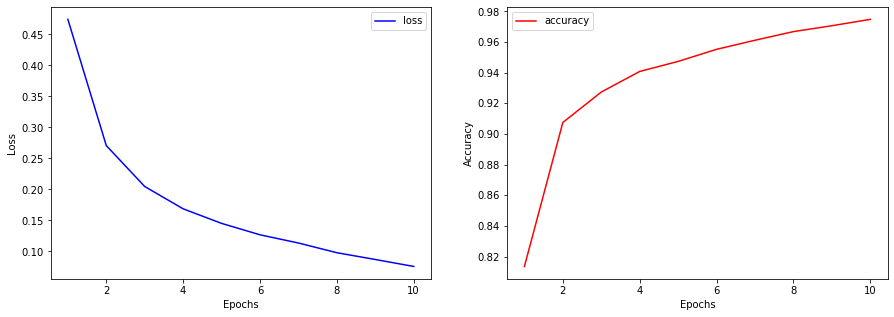

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(epochs, loss_values, 'b', label='loss')
ax1.set(xlabel='Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epochs, acc_values, 'r', label='accuracy')
ax2.set(xlabel='Epochs', ylabel='Accuracy')
ax2.legend()

plt.show()